In [1]:
import LSTM
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

# Get data, 数据增强，在5-1中筛选了数据进行补充，其余作为测试数据

In [2]:
data = np.load('./databygroup.npy',allow_pickle=True).tolist()
#聚类筛选的数据，从step5-1中直接复制
TrainData,TestData={},{}
for k in data.keys():
    TrainData[k]=data[k]
    TestData[k]=data[k]
        
#Tdata=TrainData[TrainData.keys()]
step=20
xtrain,ytrain=[],[]
for k in TrainData.keys():
    for i in range(int(0.8*TrainData[k].shape[0])-step-1):
        xtrain.append(TrainData[k][i:i+step,:TrainData[k].shape[1]-5].tolist())
        ytrain.append(TrainData[k][i+1+step,[-5,-4,-3,-2,-1]].tolist())
    #xtrain.append(xtem)
    #ytrain.append(ytem)
xtrain = Variable(torch.FloatTensor(xtrain))
ytrain = Variable(torch.FloatTensor(ytrain))
print(xtrain.shape,ytrain.shape)

torch.Size([34684, 20, 15]) torch.Size([34684, 5])


In [19]:
ind = np.array([i for i in range(int(xtrain.shape[0]*0.7))])
print(ind.shape)
np.save('./0.7alldata_v2.npy',ind)

(24278,)


# LSTM

## 训练

In [3]:
param={
        'inputsize':xtrain.shape[2],
        'outputsize':ytrain.shape[1],
        'windowsize':xtrain.shape[1],
        'LSTM_hidden':100,
        'num_layer':4,
        'learning_rate':0.001,
        'opt':'Adam',
    }

# 训练并保存训练过程图

In [4]:
net = LSTM.Net(param)
ind = np.load('./0.7alldata.npy').tolist()
print(net)

mask = np.ones(xtrain.shape[0], dtype=bool)
mask[ind] = False

mse,vmse=[],[]

optimizer = torch.optim.Adam(net.parameters(),lr = param['learning_rate'])
loss_func = torch.nn.MSELoss()

xt, yt = xtrain[ind], ytrain[ind]
xv, yv = xtrain[mask], ytrain[mask]

for t in range(1000):
 
    output = net(xt)
    loss = loss_func(output,yt)
            
    vp = net(xv)
    lossv = loss_func(vp,yv)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    mse.append(loss.detach().numpy())
    vmse.append(lossv.detach().numpy())
    print('Epoch:', t, ' Loss:',mse[-1],' v Loss:',vmse[-1])
    
    if np.mod(t,10)==0:
        np.save('./LSTM_mse.npy',mse)
        np.save('./LSTM_vmse.npy',vmse)


Net(
  (lstm): LSTM(15, 100, num_layers=4, batch_first=True, dropout=0.5)
  (fc1): Linear(in_features=2000, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=20, bias=True)
  (fc3): Linear(in_features=20, out_features=5, bias=True)
)
Epoch: 0  Loss: 0.18674803  v Loss: 0.18801387
Epoch: 1  Loss: 0.17487042  v Loss: 0.17628828
Epoch: 2  Loss: 0.1639167  v Loss: 0.16548079
Epoch: 3  Loss: 0.1527916  v Loss: 0.15454163
Epoch: 4  Loss: 0.14190802  v Loss: 0.1438538
Epoch: 5  Loss: 0.1325959  v Loss: 0.1347558
Epoch: 6  Loss: 0.12647633  v Loss: 0.1288366
Epoch: 7  Loss: 0.12397664  v Loss: 0.12649888
Epoch: 8  Loss: 0.1232927  v Loss: 0.12586963
Epoch: 9  Loss: 0.122245334  v Loss: 0.124798246
Epoch: 10  Loss: 0.119630635  v Loss: 0.12209855
Epoch: 11  Loss: 0.11469725  v Loss: 0.116974115
Epoch: 12  Loss: 0.107773066  v Loss: 0.10979481
Epoch: 13  Loss: 0.10120019  v Loss: 0.102990754
Epoch: 14  Loss: 0.097055785  v Loss: 0.09856808
Epoch: 15  Loss: 0.094509184  v L

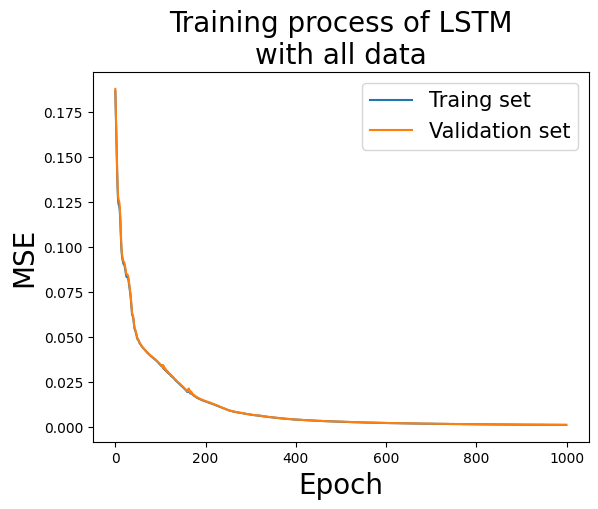

In [5]:
#font1={'family':'Times New Roman','weight':'normal','size':20}
#font2={'family':'Times New Roman','weight':'normal','size':10}

font1={'weight':'normal','size':20}
font2={'weight':'normal','size':10}

plt.plot(mse,label='Traing set')
plt.plot(vmse,label='Validation set')
plt.title('Training process of LSTM'+'\n'+'with all data',font=font1)
plt.xlabel('Epoch',font=font1)
plt.ylabel('MSE',font=font1)
plt.legend(prop = {'size':15})
plt.savefig('./fig9-b.tif',bbox_inches = 'tight',dpi=200)